<a href="https://colab.research.google.com/github/GaurangRawat/Machine-Learning-Projects/blob/main/ML%20Algorithms/Catboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.0 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor, Pool

import shap

import seaborn as sns
diamonds = sns.load_dataset('diamonds')

In [4]:
df = pd.DataFrame(diamonds)

In [5]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
df.dtypes

,0
carat,float64
cut,category
color,category
clarity,category
depth,float64
table,float64
price,int64
x,float64
y,float64
z,float64


In [9]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')

In [10]:
df.dtypes

,0
carat,float64
cut,category
color,category
clarity,category
depth,float64
table,float64
price,int64
x,float64
y,float64
z,float64


In [18]:
X = df.drop(['price'], axis=1)
y = df['price']

In [20]:
X.head(1)

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43


In [21]:
cat_features = X.select_dtypes(include=['category']).columns.tolist()

In [22]:
cat_features

['cut', 'color', 'clarity']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6)

In [25]:
model.fit(X_train, y_train, cat_features=cat_features, eval_set=(X_test, y_test), plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 3651.6706669	test: 3645.2886484	best: 3645.2886484 (0)	total: 82.6ms	remaining: 8.18s
1:	learn: 3351.6387912	test: 3342.6818053	best: 3342.6818053 (1)	total: 121ms	remaining: 5.95s
2:	learn: 3086.4665738	test: 3076.4726785	best: 3076.4726785 (2)	total: 148ms	remaining: 4.8s
3:	learn: 2849.3823989	test: 2837.3096937	best: 2837.3096937 (3)	total: 174ms	remaining: 4.17s
4:	learn: 2643.6706918	test: 2630.7350719	best: 2630.7350719 (4)	total: 202ms	remaining: 3.83s
5:	learn: 2462.9508874	test: 2448.7444734	best: 2448.7444734 (5)	total: 231ms	remaining: 3.62s
6:	learn: 2303.5463482	test: 2290.0140823	best: 2290.0140823 (6)	total: 258ms	remaining: 3.43s
7:	learn: 2164.7635973	test: 2150.7064600	best: 2150.7064600 (7)	total: 294ms	remaining: 3.38s
8:	learn: 2044.6875347	test: 2030.5460192	best: 2030.5460192 (8)	total: 322ms	remaining: 3.25s
9:	learn: 1941.3994840	test: 1926.1901799	best: 1926.1901799 (9)	total: 350ms	remaining: 3.15s
10:	learn: 1852.1955188	test: 1837.2908977	best: 1

In [26]:
preds = model.predict(X_test)


from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, preds)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 330186.68215597613


##External ***SHAP***

---



In [27]:
# Initialize the SHAP explainer
explainer = shap.Explainer(model)

In [28]:
# Compute SHAP values for the test set
shap_values = explainer(X_test)

In [29]:
shap_values

.values =
array([[ -948.3094724 ,    29.74137355,    13.26422408, ...,
         -769.58488841, -1260.04005745,  -778.9285485 ],
       [ -872.38629094,   -13.79215958,   187.85628655, ...,
         -140.52605155,  -777.42756469,  -483.89224251],
       [ -803.73116086,    38.9795367 ,   305.60313047, ...,
         -667.49984997, -1245.97435532,  -773.12831782],
       ...,
       [ -807.33036761,   -22.65571613,    11.81629695, ...,
         -722.73083087, -1225.59056386,  -752.53397717],
       [ 1658.80571382,   108.22992427,   617.74110119, ...,
           89.49613946,  1391.70832137,   897.61693551],
       [  577.93094046,   -41.81085357,  -971.29378862, ...,
          149.44157434,   423.70276493,   444.29577242]])

.base_values =
array([3939.35853733, 3939.35853733, 3939.35853733, ..., 3939.35853733,
       3939.35853733, 3939.35853733])

.data =
array([[0.24, 'Ideal', 'G', ..., 3.97, 4.0, 2.47],
       [0.58, 'Very Good', 'F', ..., 5.44, 5.42, 3.26],
       [0.4, 'Ideal', 'E', 

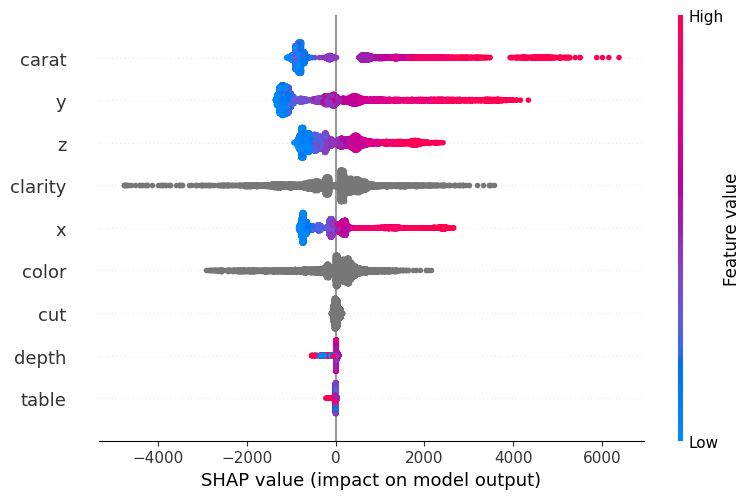

In [30]:
shap.summary_plot(shap_values, X_test)

In [31]:

shap_df = pd.DataFrame(shap_values.values, columns=X_test.columns)

In [32]:
shap_df.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,-948.309472,29.741374,13.264224,468.450833,13.774276,4.440762,-769.584888,-1260.040057,-778.928549
1,-872.386291,-13.792160,187.856287,494.792624,-21.374457,4.403128,-140.526052,-777.427565,-483.892243
2,-803.731161,38.979537,305.603130,474.399168,13.581703,4.939796,-667.499850,-1245.974355,-773.128318
3,-800.171139,-29.980288,306.019324,477.903521,7.919192,4.939796,-658.677611,-1131.463215,-782.910371
4,2044.149312,113.501220,756.063096,-2052.375106,49.223020,27.156931,1164.615968,2333.085582,1486.637651


##Inbuilt ***SHAP***

---



In [33]:
shap_values = model.get_feature_importance(type='ShapValues', data=Pool(X_test, label=y_test, cat_features=cat_features))

shap_values = np.array(shap_values)[:, :-1]

shap_df = pd.DataFrame(shap_values, columns=X_test.columns)

shap_df.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,-948.309472,29.741374,13.264224,468.450833,13.774276,4.440762,-769.584888,-1260.040057,-778.928549
1,-872.386291,-13.792160,187.856287,494.792624,-21.374457,4.403128,-140.526052,-777.427565,-483.892243
2,-803.731161,38.979537,305.603130,474.399168,13.581703,4.939796,-667.499850,-1245.974355,-773.128318
3,-800.171139,-29.980288,306.019324,477.903521,7.919192,4.939796,-658.677611,-1131.463215,-782.910371
4,2044.149312,113.501220,756.063096,-2052.375106,49.223020,27.156931,1164.615968,2333.085582,1486.637651
